### Imports

In [2]:
import tensorflow as tf
import numpy as np
from PIL import Image
import nbimporter
import Model
import datetime

### Data init

In [4]:
X_train = np.load("/root/U-netKeras/data/clouddata_normalized.npy")
Y_train = np.load("/root/U-netKeras/data/mask.npy")
X_test = np.zeros(( 2, 1024, 1024, 6), dtype=np.float64)

### Model

In [11]:
model = Model.model(1024, 1024, 6)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1024, 1024,  0           []                               
                                 6)]                                                              
                                                                                                  
 conv2d_19 (Conv2D)             (None, 1024, 1024,   880         ['input_2[0][0]']                
                                16)                                                               
                                                                                                  
 dropout_9 (Dropout)            (None, 1024, 1024,   0           ['conv2d_19[0][0]']              
                                16)                                                         

 dropout_15 (Dropout)           (None, 256, 256, 64  0           ['conv2d_31[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_32 (Conv2D)             (None, 256, 256, 64  36928       ['dropout_15[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_transpose_6 (Conv2DTran  (None, 512, 512, 32  8224       ['conv2d_32[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatenate_6 (Concatenate)    (None, 512, 512, 64  0           ['conv2d_transpose_6[0][0]',     
          

### Add features

In [12]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('u-netCheckpoint', verbose=1, save_best_only=True)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=15, monitor='loss'),
    tf.keras.callbacks.TensorBoard(log_dir='/root/U-netKeras/logs')
]

### Teaching

In [13]:
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=4, epochs=2, callbacks=callbacks)

Epoch 1/2
11/11 [==============================] - 5s 322ms/step - loss: 0.6932 - accuracy: 0.5827 - val_loss: 0.6426 - val_accuracy: 0.6723
Epoch 2/2
11/11 [==============================] - 3s 289ms/step - loss: 0.6632 - accuracy: 0.6244 - val_loss: 0.6412 - val_accuracy: 0.6723


### Save weights

In [8]:
model.save("/root/U-netKeras/saves/model" + datetime.datetime.now().strftime("%d-%m-%Y_%H-%M-%S"))

2022-03-29 12:34:07.766887: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /root/U-netKeras/saves/model29-03-2022_12-34-06/assets


### Load weights

In [9]:
model = tf.keras.models.load_model('/root/U-netKeras/saves/model29-03-2022_12-34-06')

### Testing

1/1 [==============================] - 0s 176ms/step


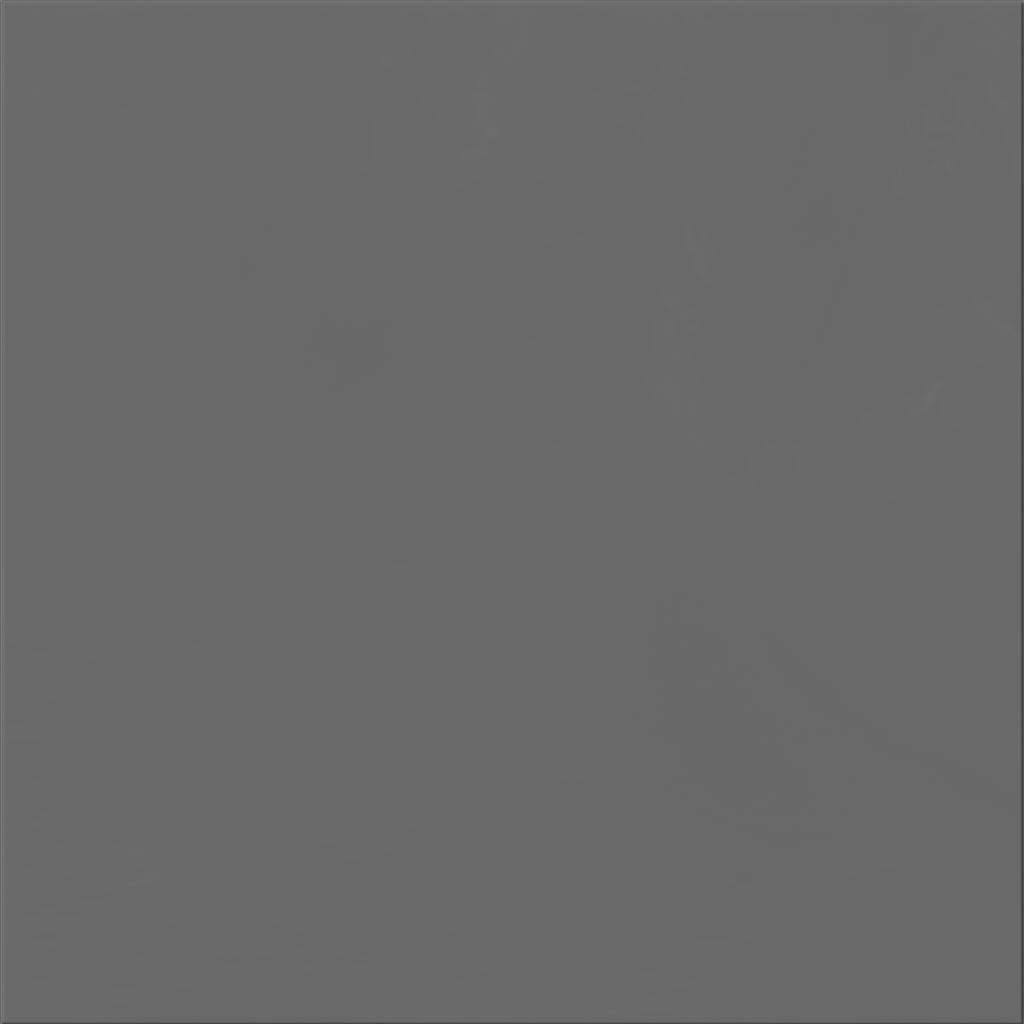

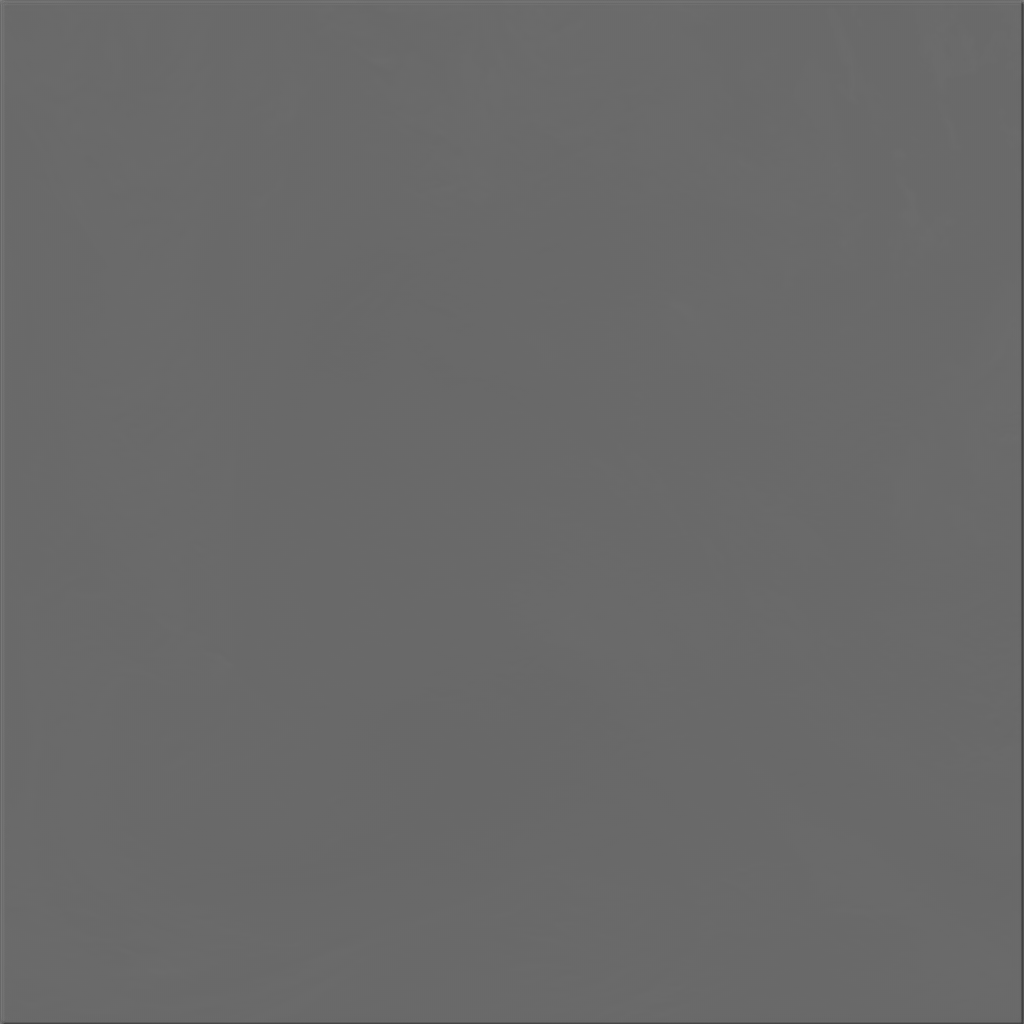

In [10]:
X_test[0] = X_train[0]
X_test[1] = X_train[32]
test = model.predict(X_test, verbose=1)

for n in test:
    for p1 in range(1024):
        for p2 in range(1024):
            if n[p1][p2] > 2:
                n[p1][p2] = 1
            #else:
                #n[p1][p2] = 0
    n = n * 255
    img = Image.fromarray(np.squeeze(n).astype("uint8"))
    name = 0
    img.show()
    name += 1